In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [2]:
pd.options.display.max_rows = 999

In [3]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_corr = train[['GrLivArea','GarageArea','1stFlrSF','TotalBsmtSF','SalePrice','LotFrontage']]

In [4]:
train.corr()['SalePrice']

Id              -0.021917
MSSubClass      -0.084284
LotFrontage      0.351799
LotArea          0.263843
OverallQual      0.790982
OverallCond     -0.077856
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.477493
BsmtFinSF1       0.386420
BsmtFinSF2      -0.011378
BsmtUnfSF        0.214479
TotalBsmtSF      0.613581
1stFlrSF         0.605852
2ndFlrSF         0.319334
LowQualFinSF    -0.025606
GrLivArea        0.708624
BsmtFullBath     0.227122
BsmtHalfBath    -0.016844
FullBath         0.560664
HalfBath         0.284108
BedroomAbvGr     0.168213
KitchenAbvGr    -0.135907
TotRmsAbvGrd     0.533723
Fireplaces       0.466929
GarageYrBlt      0.486362
GarageCars       0.640409
GarageArea       0.623431
WoodDeckSF       0.324413
OpenPorchSF      0.315856
EnclosedPorch   -0.128578
3SsnPorch        0.044584
ScreenPorch      0.111447
PoolArea         0.092404
MiscVal         -0.021190
MoSold           0.046432
YrSold          -0.028923
SalePrice        1.000000
Name: SalePr

/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


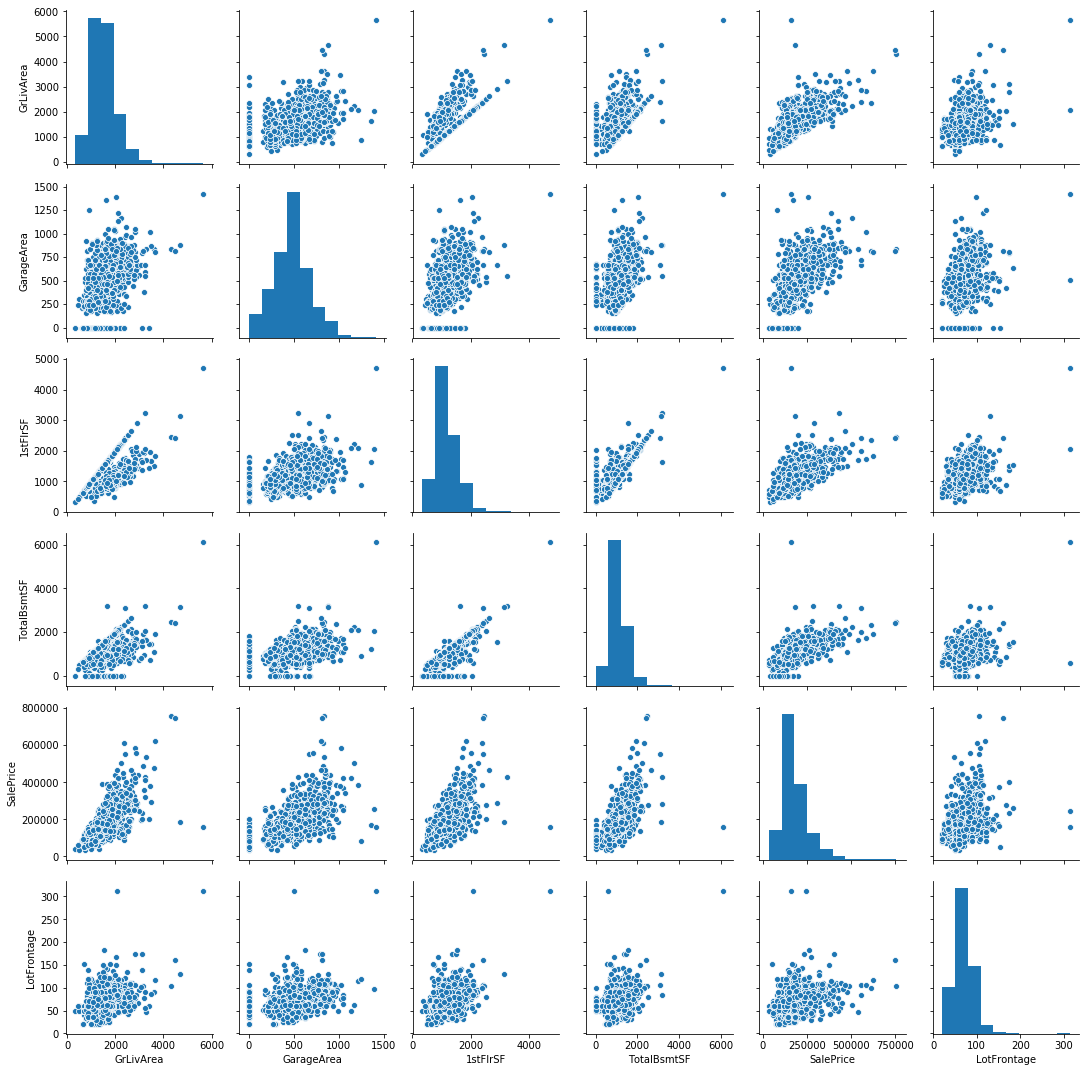

In [5]:
import seaborn as sns
ax = sns.pairplot(train_corr)

In [6]:
correlation = train.corr()
highestCorrelationCols = list(correlation.nlargest(8,'SalePrice')[['SalePrice']].index)

In [7]:
import numpy as np

In [8]:
#train = train[highestCorrelationCols]
X = train_corr.drop('SalePrice',axis=1)
y = train_corr['SalePrice']

In [9]:
# https://medium.com/vickdata/a-simple-guide-to-scikit-learn-pipelines-4ac0d974bdcf
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.impute import SimpleImputer
numeric_transformer = Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(categories='auto'))])

numeric_features = ['GrLivArea','GarageArea','1stFlrSF','TotalBsmtSF','LotFrontage']
categorical_features = ['OverallQual','FullBath']
from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
transformers=[('num', numeric_transformer, numeric_features)])
#('cat', categorical_transformer, categorical_features)])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ("linear_svr", LinearRegression())])
rf.fit(X,y)
print("model score: %.3f" % rf.score(X_test, y_test))

model score: 0.733


In [12]:
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')
test_X = test[['GrLivArea','GarageArea','1stFlrSF','TotalBsmtSF','LotFrontage']]

In [13]:
predicted_prices = rf.predict(test_X)
my_submission = pd.DataFrame({'Id': test.Id, 'SalePrice': predicted_prices})
print(len(my_submission))
my_submission.to_csv('submission-Linear_SamShifflett.csv', index=False)

1459
